<a href="https://colab.research.google.com/github/tmarissa/marissa_DATA606/blob/main/ipynb/505_K_Means_FIPS_PCA_(Uncleansed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Density and Real Estate (FIPS Level)__<br><br>
This notebook:
- Real Estate data with outliers
- Kmeans uses Average Listing Price (2019 and 2021), rural percentage (2010) and Density (2020)
- Kmeans for 2019 and 2021
    - FIPS - whole United States
    - Individual State Level 
        - Arizona (AZ)
        - Massachussets (MA)
               
References:<br>
https://github.com/knoppin1/DATA-606-Capstone
https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/

In [1]:
import pandas as pd
import matplotlib
from sklearn.cluster import KMeans
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# 1. Density and Real Estate

## 1.1 Read  CSV
- Load Density and Real Estate files that still contains outlier.
- Groupby FIPS and State

### 1.1a For the Year 2019

In [2]:
df_2019 = pd.read_csv('df_outliers_2019.csv', index_col = False)
df_2019.sample(5)

,FIPS,year,state,county,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
10223,18129,2019,IN,Posey County,61,161550.0,-0.0050,0.4301,148400.0,0.0102,0.8929,66.761868,1,44.0
5137,13097,2019,GA,Douglas County,720,277090.0,-0.0076,0.0516,249900.0,0.0093,0.0965,15.757196,2,1709.0
3892,12021,2019,FL,Collier County,188,894021.0,-0.0100,0.0138,467000.0,-0.0043,0.0243,8.485942,2,7725.0
27399,42127,2019,PA,Wayne County,70,272893.0,-0.0041,0.0726,199000.0,-0.0045,0.0504,88.093976,1,1228.0
20374,37115,2019,NC,Madison County,47,423359.0,0.0053,-0.0104,344500.0,0.0390,0.0833,90.618378,1,197.0


In [3]:
df_2019.describe()

,FIPS,year,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
count,37162.000000,37162.0,37162.000000,3.716200e+04,37112.000000,37005.000000,3.716200e+04,37112.000000,37005.000000,37162.000000,37162.000000,37162.000000
mean,30325.901405,2019.0,277.911119,3.008603e+05,0.010421,0.091333,2.235529e+05,0.011932,0.085717,58.206802,1.404768,541.510844
std,15144.751009,0.0,1864.994103,2.699615e+05,0.184557,0.606530,1.603973e+05,0.250859,0.555977,31.324669,0.490854,1547.508120
min,1001.000000,2019.0,0.000000,9.900000e+03,-0.939100,-0.990300,9.900000e+03,-0.956200,-0.978600,0.000000,1.000000,0.000000
25%,18171.000000,2019.0,17.000000,1.699325e+05,-0.020200,-0.037900,1.349000e+05,-0.021100,-0.032400,32.971919,1.000000,46.000000
50%,29153.000000,2019.0,45.000000,2.384195e+05,0.002300,0.039200,1.850000e+05,0.000000,0.043200,58.962876,1.000000,141.000000
75%,45063.000000,2019.0,119.000000,3.459980e+05,0.028100,0.130900,2.725000e+05,0.028700,0.132700,85.593258,2.000000,422.000000
max,56045.000000,2019.0,74211.000000,5.394137e+06,14.114500,39.000000,4.245000e+06,24.600000,39.000000,100.000000,2.000000,30830.000000


In [4]:
# Groupby FIPS
df_FIPS_2019 = df_2019.groupby(by=['FIPS', 'state', 'county', 'density', 'rural_%', 'rural_cat'])['average_listing_price'].mean().reset_index()
df_FIPS_2019.head(3)

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
0,1001,AL,Autauga County,98,42.002162,2,244277.166667
1,1003,AL,Baldwin County,145,42.279099,2,448810.000000
2,1005,AL,Barbour County,28,67.789635,1,250540.000000


In [5]:
df_FIPS_2019.describe()

,FIPS,density,rural_%,rural_cat,average_listing_price
count,3122.000000,3122.000000,3122.000000,3122.000000,3.122000e+03
mean,30355.199552,277.304292,58.474045,1.401986,2.999020e+05
std,15149.044021,1860.135895,31.416720,0.490378,2.641812e+05
min,1001.000000,0.000000,0.000000,1.000000,1.490000e+04
25%,18175.500000,16.000000,33.160820,1.000000,1.713842e+05
50%,29164.000000,44.000000,59.354265,1.000000,2.367114e+05
75%,45070.500000,118.000000,86.849232,2.000000,3.440466e+05
max,56045.000000,74211.000000,100.000000,2.000000,5.082921e+06


### 1.1b For the Year 2021

In [6]:
df_2021 = pd.read_csv('df_outliers_2021.csv', index_col = False)
df_2021.head(3)

,FIPS,year,state,county,density,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,rural_%,rural_cat,total_listing_count
0,2013,2021,AK,Aleutians East Borough,0,245000.0,0.0,0.2281,245000.0,0.0,0.2281,100.0,1,1.0
1,2013,2021,AK,Aleutians East Borough,0,245000.0,0.0,0.0010,245000.0,0.0,-0.1552,100.0,1,0.0
2,2013,2021,AK,Aleutians East Borough,0,65000.0,NaN,-0.6944,65000.0,NaN,-0.7234,100.0,1,1.0


In [7]:
# Groupby FIPS
df_FIPS_2021 = df_2021.groupby(by=['FIPS', 'state', 'county', 'density', 'rural_%', 'rural_cat'])['average_listing_price'].mean().reset_index()
df_FIPS_2021.head(5)

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
0,1001,AL,Autauga County,98,42.002162,2,286362.666667
1,1003,AL,Baldwin County,145,42.279099,2,620798.000000
2,1005,AL,Barbour County,28,67.789635,1,292979.750000
3,1007,AL,Bibb County,35,68.352607,1,193595.583333
4,1009,AL,Blount County,91,89.951502,1,305443.083333


In [8]:
df_FIPS_2021.describe()

,FIPS,density,rural_%,rural_cat,average_listing_price
count,3123.000000,3123.000000,3123.000000,3123.000000,3.123000e+03
mean,30373.041306,277.215178,58.495813,1.401857,3.925298e+05
std,15130.243997,1859.844631,31.428102,0.490352,4.004564e+05
min,1001.000000,0.000000,0.000000,1.000000,4.500000e+04
25%,18180.000000,16.000000,33.172939,1.000000,2.059507e+05
50%,29169.000000,44.000000,59.376034,1.000000,3.017543e+05
75%,45070.000000,118.000000,87.037801,2.000000,4.492404e+05
max,56045.000000,74211.000000,100.000000,2.000000,8.044027e+06


# 2. K-means

## 2.1 FIPS

### 2.1a For the Year 2019

In [9]:
scaler = StandardScaler()
FIPS_2019 = df_FIPS_2019[['county','density', 'average_listing_price', 'rural_%', 'rural_cat']]
scale =scaler.fit_transform(FIPS_2019[['density', 'average_listing_price', 'rural_%']])
FIPS_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
FIPS_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.096409,-0.210589,-0.524387
1,-0.071138,0.563749,-0.515571
2,-0.134046,-0.186879,0.296564
3,-0.130282,-0.462829,0.314487
4,-0.100172,-0.266469,1.002094


In [10]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(FIPS_2019_scale)
pca_FIPS_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_FIPS_2019.head(5)

,principal_component1,principal_component2
0,0.102285,-0.516798
1,0.581486,-0.348672
2,-0.352551,0.128610
3,-0.527405,0.092834
4,-0.765674,0.701411


### Determine Optimal Clusters (Elbow Method)

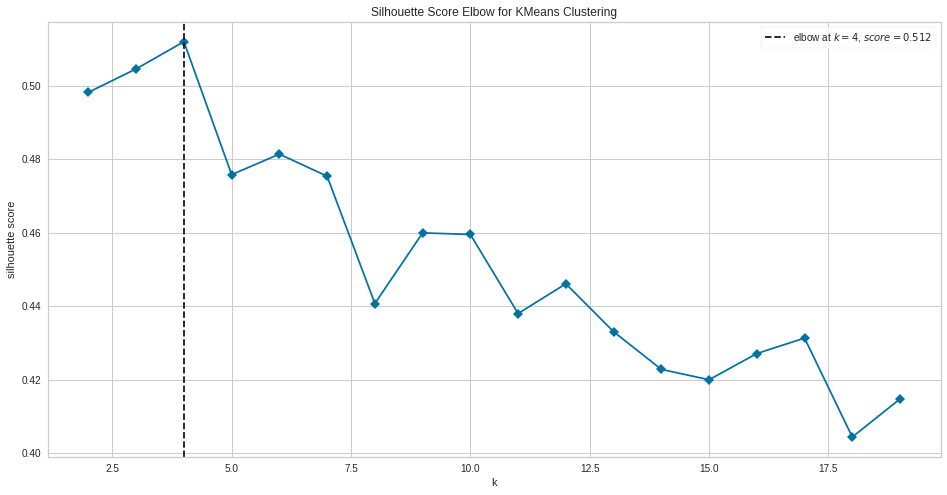

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_FIPS_2019)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [12]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_FIPS_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is " +str(
        metrics.silhouette_score(pca_FIPS_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.497483017638662
Silhouette score for k(clusters)= 4 is 0.5038901089846065
Silhouette score for k(clusters)= 5 is 0.48380546982713035
Silhouette score for k(clusters)= 6 is 0.48940060033592014
Silhouette score for k(clusters)= 7 is 0.4676952353056563
Silhouette score for k(clusters)= 8 is 0.4401935630717685
Silhouette score for k(clusters)= 9 is 0.45195223944770796
Silhouette score for k(clusters)= 10 is 0.455195898006947
Silhouette score for k(clusters)= 11 is 0.43958780099440403
Silhouette score for k(clusters)= 12 is 0.45234704986533486
Silhouette score for k(clusters)= 13 is 0.43060437946315233
Silhouette score for k(clusters)= 14 is 0.4313729194183156


In [13]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_FIPS_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [14]:
# Sum of Square errors 
kmeans.inertia_

410.57267874820343

In [15]:
# No of iteration required to convergence
kmeans.n_iter_

12

In [16]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_FIPS_2019)
Counter(labels)

Counter({0: 131,
         1: 347,
         2: 2,
         3: 656,
         4: 110,
         5: 521,
         6: 1,
         7: 26,
         8: 605,
         9: 7,
         10: 716})

In [17]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
4,0,131
5,1,347
9,2,2
0,3,656
6,4,110
1,5,521
10,6,1
7,7,26
2,8,605
8,9,7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'Counties')

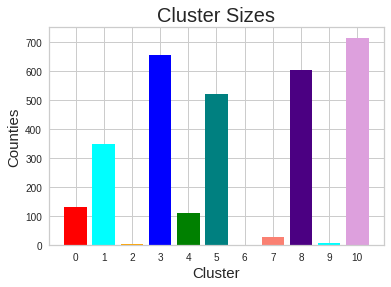

In [18]:
plt.bar('cluster', 'counties', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [19]:
pca_FIPS_2019['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.14687449,  0.85888634],
       [ 1.10317603, -0.95679721],
       [13.8449208 ,  9.9557941 ],
       [-0.1058987 , -0.27351531],
       [ 2.32351535, -0.52534341],
       [ 0.36535483, -0.80380845],
       [31.17310401, 22.99819223],
       [ 4.99647321,  0.79274901],
       [-0.50888012,  0.24279666],
       [ 8.8995851 ,  3.45023716],
       [-1.0099373 ,  0.89361729]])

In [20]:
# Look at outlier
pca_FIPS_2019[pca_FIPS_2019.cluster==4][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
100,1.880253,-1.115403
183,3.459318,-0.316847
189,3.000038,-0.580004
205,1.730762,0.078472
213,1.984155,-0.766950
...,...,...
2924,2.231408,-0.405085
2929,1.882086,-0.862521
2932,1.912281,-0.656109
2949,2.964812,-0.629215


In [21]:
km = KMeans(n_clusters=11)
kmeans = km.fit(pca_FIPS_2019)

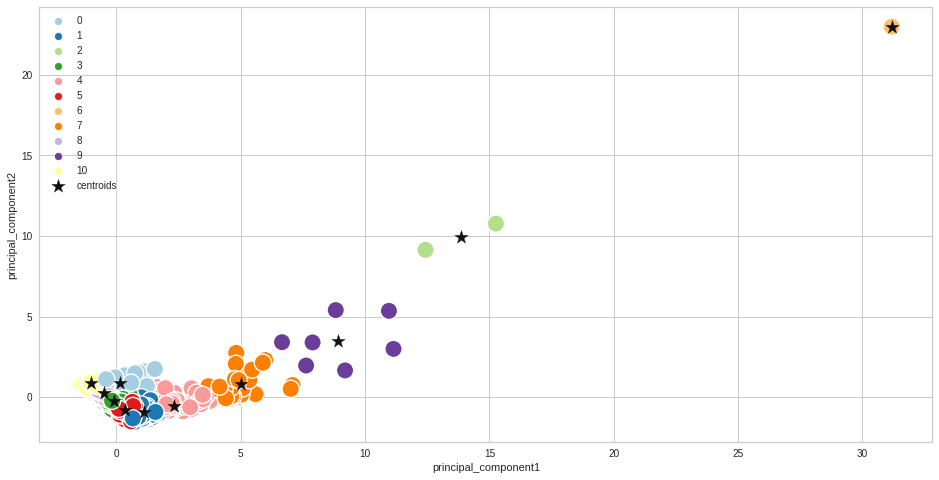

In [22]:
#pca_FIPS_2019['clusters']=km.labels_
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_FIPS_2019, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [23]:
pca_FIPS_2019.head(3)

,principal_component1,principal_component2,cluster
0,0.102285,-0.516798,3
1,0.581486,-0.348672,5
2,-0.352551,0.128610,8


In [24]:
FIPS_2019.head(3)

,county,density,average_listing_price,rural_%,rural_cat
0,Autauga County,98,244277.166667,42.002162,2
1,Baldwin County,145,448810.000000,42.279099,2
2,Barbour County,28,250540.000000,67.789635,1


In [25]:
FIPS_2019['cluster']=pca_FIPS_2019['cluster']
FIPS_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
0,Autauga County,98,244277.166667,42.002162,3
1,Baldwin County,145,448810.000000,42.279099,5
2,Barbour County,28,250540.000000,67.789635,8


In [26]:
FIPS_2019[(FIPS_2019['cluster']==4)]

,county,density,average_listing_price,rural_%,rural_cat,cluster
100,Maricopa County,480,6.675222e+05,2.363800,2,4
183,Alameda County,2276,1.096921e+06,0.388606,2,4
189,Contra Costa County,1628,9.877905e+05,0.792736,2,4
205,Mendocino County,26,9.880895e+05,45.230587,2,4
213,Placer County,287,8.253600e+05,13.787195,2,4
...,...,...,...,...,...,...
2924,Richmond city,3788,3.536832e+05,0.000000,2,4
2929,Virginia Beach city,1845,4.767824e+05,1.534496,2,4
2932,Winchester city,3046,3.153292e+05,0.000000,2,4
2949,King County,1072,1.066159e+06,3.207147,2,4


### Identifies the Cluster's Properties

In [27]:
for x in range(0,11):
  print("This is the FIPS 2019 cluster ", x, "\n", FIPS_2019[(FIPS_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the FIPS 2019 cluster  0 
           density  average_listing_price     rural_%  rural_cat
count  131.000000           1.310000e+02  131.000000      131.0
mean    39.618321           6.081835e+05   86.110969        1.0
min      0.000000           4.023926e+05   57.463778        1.0
max    166.000000           1.312129e+06  100.000000        1.0 

This is the FIPS 2019 cluster  1 
            density  average_listing_price     rural_%   rural_cat
count   347.000000             347.000000  347.000000  347.000000
mean    599.247839          404473.704851   14.500595    1.991354
min       2.000000          120681.250000    0.000000    1.000000
max    2930.000000          837807.500000   53.653823    2.000000 

This is the FIPS 2019 cluster  2 
        density  average_listing_price   rural_%  rural_cat
count      2.0           2.000000e+00  2.000000        2.0
mean   36806.5           9.329080e+05  0.002146        2.0
min    34979.0           5.641794e+05  0.001477        2.0
max  

### 2.1b For the Year 2021

In [28]:
FIPS_2021 = df_FIPS_2021[['county','density', 'average_listing_price', 'rural_%', 'rural_cat']]
scale = scaler.fit_transform(FIPS_2021[['density', 'average_listing_price', 'rural_%']])
FIPS_scale_2021 = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
FIPS_scale_2021.head(5)

,density,average_listing_price,rural_%
0,-0.096376,-0.265158,-0.524890
1,-0.071101,0.570111,-0.516077
2,-0.134019,-0.248631,0.295764
3,-0.130255,-0.496848,0.313680
4,-0.100140,-0.217504,1.001038


In [29]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(FIPS_scale_2021)
pca_FIPS_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_FIPS_2021.head(5)

,principal_component1,principal_component2
0,0.109542,-0.402128
1,0.572737,0.293458
2,-0.389925,-0.039857
3,-0.533019,-0.242235
4,-0.770540,0.261897


### Determine Optimal Clusters (Elbow Method)

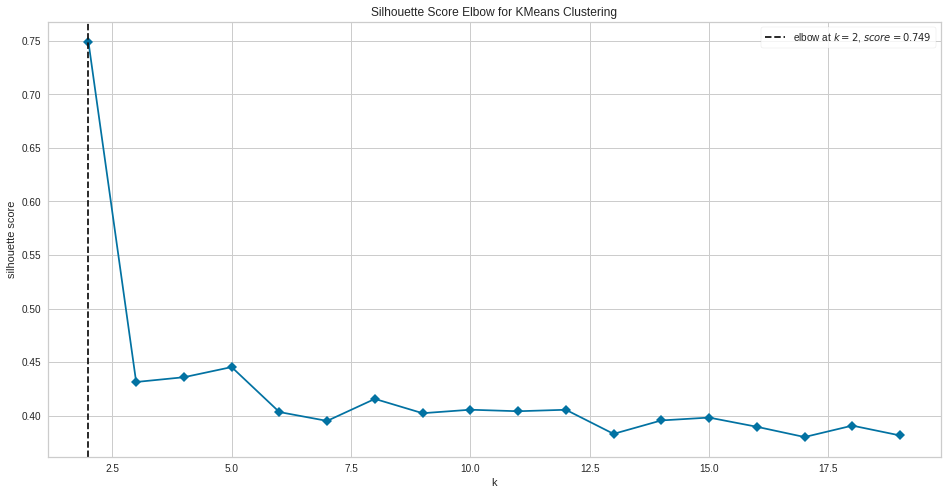

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_FIPS_2021)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [31]:
for i in range(3, 15):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_FIPS_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_FIPS_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 3 is 0.4353205519659722
Silhouette score for k(clusters)= 4 is 0.43751732458044
Silhouette score for k(clusters)= 5 is 0.4464366280659842
Silhouette score for k(clusters)= 6 is 0.4057727655701063
Silhouette score for k(clusters)= 7 is 0.3992796112369846
Silhouette score for k(clusters)= 8 is 0.41862532951423587
Silhouette score for k(clusters)= 9 is 0.4090598878101145
Silhouette score for k(clusters)= 10 is 0.4175093410476573
Silhouette score for k(clusters)= 11 is 0.3995500579728813
Silhouette score for k(clusters)= 12 is 0.4123099932779171
Silhouette score for k(clusters)= 13 is 0.37790199079066006
Silhouette score for k(clusters)= 14 is 0.3834514446159748


In [32]:
K = range(2, 12)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_FIPS_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [33]:
# Sum of Square errors 
kmeans.inertia_

789.3502555093023

In [34]:
# No. of iteration required to converge
kmeans.n_iter_

12

In [35]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_FIPS_2021)
Counter(labels)

Counter({0: 717,
         1: 24,
         2: 772,
         3: 261,
         4: 1,
         5: 8,
         6: 333,
         7: 13,
         8: 97,
         9: 2,
         10: 895})

In [36]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
0,0,717
6,1,24
2,2,772
4,3,261
10,4,1
8,5,8
3,6,333
7,7,13
5,8,97
9,9,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'Counties')

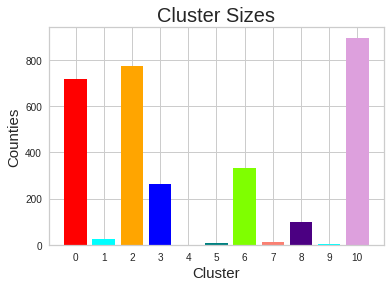

In [37]:
plt.bar('cluster', 'counties', data=counter_df, 
        color=['red', 'cyan', 'orange', 'blue', 'green', 'teal', 'chartreuse', 'salmon', 'indigo', 'aqua', 'plum'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [38]:
pca_FIPS_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.44941836, -0.47381518],
       [ 3.43342782,  3.81141112],
       [-1.00466892,  0.21148165],
       [ 1.49679635, -0.53493853],
       [28.58900645, -9.1501572 ],
       [ 6.64958046, 10.33675439],
       [-0.20264205,  0.76924114],
       [ 5.28269025, -2.04624904],
       [ 1.33173037,  1.58627059],
       [13.44455352, -6.8203208 ],
       [-0.29255448, -0.24166406]])

In [39]:
# Look at outlier
pca_FIPS_2021[pca_FIPS_2021.cluster==4][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
1850,28.589006,-9.150157


In [40]:
km = KMeans(n_clusters=11)
kmeans = km.fit(pca_FIPS_2021)

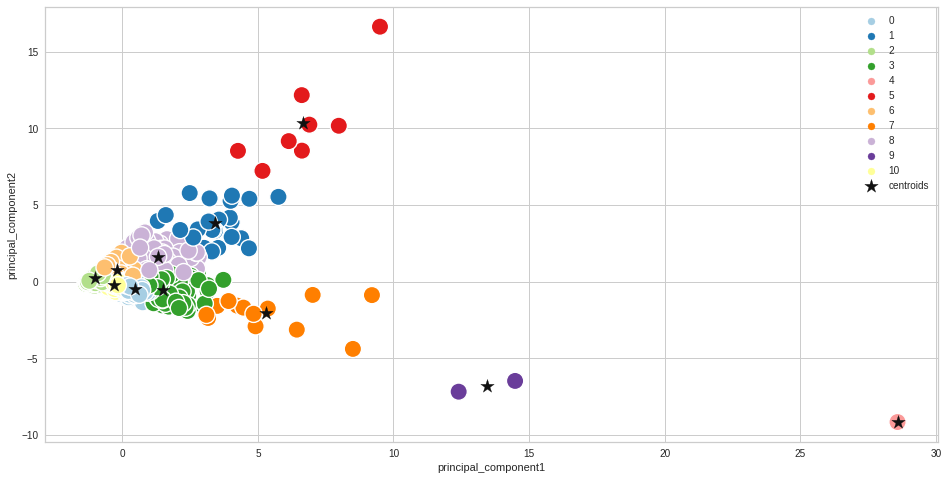

In [41]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_FIPS_2021, palette = 'Paired')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [42]:
pca_FIPS_2021.head(3)

,principal_component1,principal_component2,cluster
0,0.109542,-0.402128,0
1,0.572737,0.293458,0
2,-0.389925,-0.039857,10


In [43]:
FIPS_2021['cluster']=pca_FIPS_2021['cluster']
FIPS_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
0,Autauga County,98,286362.666667,42.002162,0
1,Baldwin County,145,620798.000000,42.279099,0
2,Barbour County,28,292979.750000,67.789635,10


In [44]:
FIPS_2021[(FIPS_2021['cluster']==2)]

,county,density,average_listing_price,rural_%,rural_cat,cluster
4,Blount County,91,305443.083333,89.951502,1,2
9,Cherokee County,45,368717.500000,85.736273,1,2
10,Chilton County,64,374422.250000,86.744724,1,2
11,Choctaw County,13,184010.750000,100.000000,1,2
13,Clay County,23,299371.000000,100.000000,1,2
...,...,...,...,...,...,...
3089,Trempealeau County,41,293584.416667,89.613409,1,2
3090,Vernon County,38,385781.916667,85.691734,1,2
3097,Waushara County,39,350846.416667,89.496244,1,2
3101,Big Horn County,3,370214.416667,100.000000,1,2


### Identifies the Cluster's Properties

In [45]:
for x in range(0,11):
  print("This is the FIPS 2021 cluster ", x, "\n", FIPS_2021[(FIPS_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the FIPS 2021 cluster  0 
           density  average_listing_price     rural_%   rural_cat
count  717.000000             717.000000  717.000000  717.000000
mean   171.277545          339646.998162   29.006373    1.997211
min      0.000000           86360.666667    2.577059    1.000000
max    836.000000          779869.000000   50.657813    2.000000 

This is the FIPS 2021 cluster  1 
            density  average_listing_price     rural_%  rural_cat
count    24.000000           2.400000e+01   24.000000  24.000000
mean    623.083333           2.427830e+06   28.592273   1.791667
min       0.000000           1.783225e+06    0.143344   1.000000
max    4031.000000           3.515462e+06  100.000000   2.000000 

This is the FIPS 2021 cluster  2 
        density  average_listing_price     rural_%  rural_cat
count   772.00             772.000000  772.000000      772.0
mean     21.25          236301.331041   96.143662        1.0
min       0.00           45000.000000   77.735140        1

## 2.2 Individual State - Arizona

### 2.2a For the Year 2019

In [46]:
AZ_2019 = df_FIPS_2019[(df_FIPS_2019['state'] == 'AZ')]
AZ_2019

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price
93,4001,AZ,Apache County,5,74.061076,1,463216.250000
94,4003,AZ,Cochise County,20,36.301067,2,252562.333333
95,4005,AZ,Coconino County,7,31.466066,2,666891.166667
96,4007,AZ,Gila County,11,41.062000,2,471559.333333
97,4009,AZ,Graham County,8,46.437399,2,241557.583333
98,4011,AZ,Greenlee County,5,46.568686,2,239195.500000
99,4012,AZ,La Paz County,3,56.327786,1,315948.583333
100,4013,AZ,Maricopa County,480,2.363800,2,667522.250000
101,4015,AZ,Mohave County,16,22.963644,2,374457.583333
102,4017,AZ,Navajo County,10,54.138242,1,391470.833333


In [47]:
AZ_2019.shape

(15, 7)

In [48]:
scaler = StandardScaler()
scale =scaler.fit_transform(AZ_2019[['density', 'average_listing_price', 'rural_%']])
AZ_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
AZ_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.447950,0.378135,2.094111
1,-0.319557,-1.100545,0.114922
2,-0.430831,1.807827,-0.138504
3,-0.396593,0.436699,0.364466
4,-0.422272,-1.177793,0.646218


In [49]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(AZ_2019_scale)
pca_AZ_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_AZ_2019.head(5)

,principal_component1,principal_component2
0,-1.301200,-1.592304
1,-0.820060,0.782015
2,0.692500,-1.391217
3,-0.251389,-0.598007
4,-1.228820,0.516832


### Determine Optimal Clusters (Elbow Method)

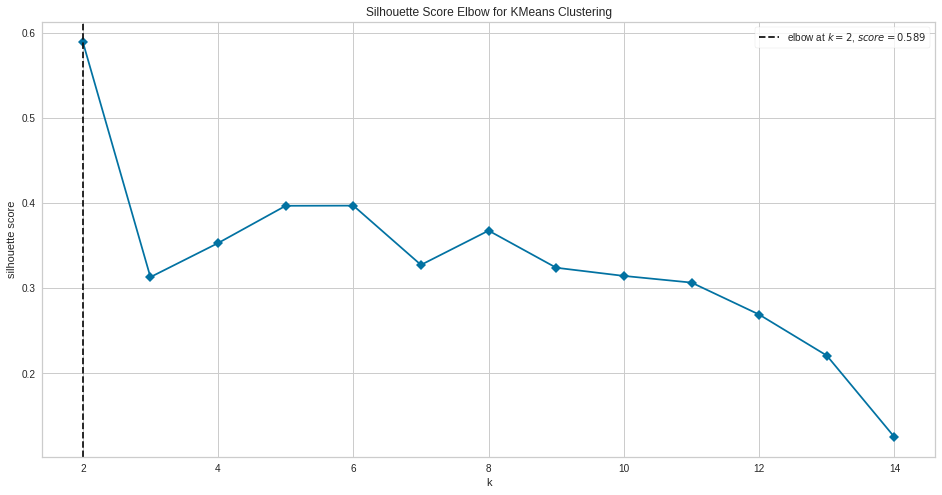

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_AZ_2019)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [51]:
for i in range(2, 10):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_AZ_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_AZ_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5892476057423935
Silhouette score for k(clusters)= 3 is 0.3064813351391376
Silhouette score for k(clusters)= 4 is 0.3529238667247094
Silhouette score for k(clusters)= 5 is 0.3966856479235866
Silhouette score for k(clusters)= 6 is 0.39688501562520684
Silhouette score for k(clusters)= 7 is 0.3488268254071955
Silhouette score for k(clusters)= 8 is 0.3675558459327597
Silhouette score for k(clusters)= 9 is 0.3522824218155417


In [52]:
K = range(2, 6)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_AZ_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [53]:
# Sum of Square Errors
kmeans.inertia_

4.221768719352836

In [54]:
# No. of iterator required to converge
kmeans.n_iter_

3

In [55]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_AZ_2019)
Counter(labels)

Counter({0: 5, 1: 2, 2: 1, 3: 3, 4: 4})

In [56]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
4,0,5
2,1,2
3,2,1
0,3,3
1,4,4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

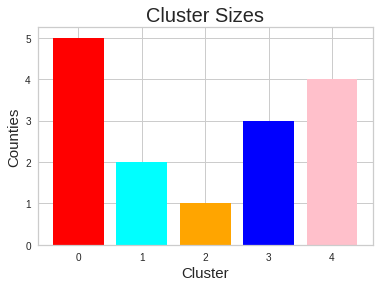

In [57]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [58]:
pca_AZ_2019['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.32096421,  0.76047776],
       [ 0.62925423, -1.2517045 ],
       [ 4.21661939, -0.15632806],
       [-0.8264202 , -0.91737858],
       [-1.15017207,  0.402371  ]])

In [59]:
# Look at outlier
pca_AZ_2019[pca_AZ_2019.cluster==0][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
8,-0.019613,0.516898
10,1.148038,0.807977
11,0.196130,0.865137
12,0.231427,0.014992
14,0.048839,1.597385


In [60]:
km = KMeans(n_clusters=5)
kmeans = km.fit(pca_AZ_2019)

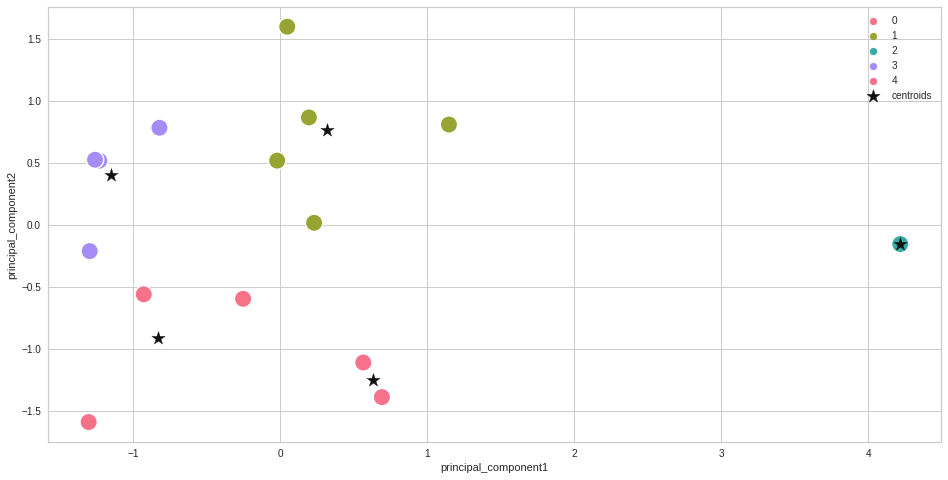

In [61]:
pca_AZ_2019['cluster']=km.labels_
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2019, palette = 'husl')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

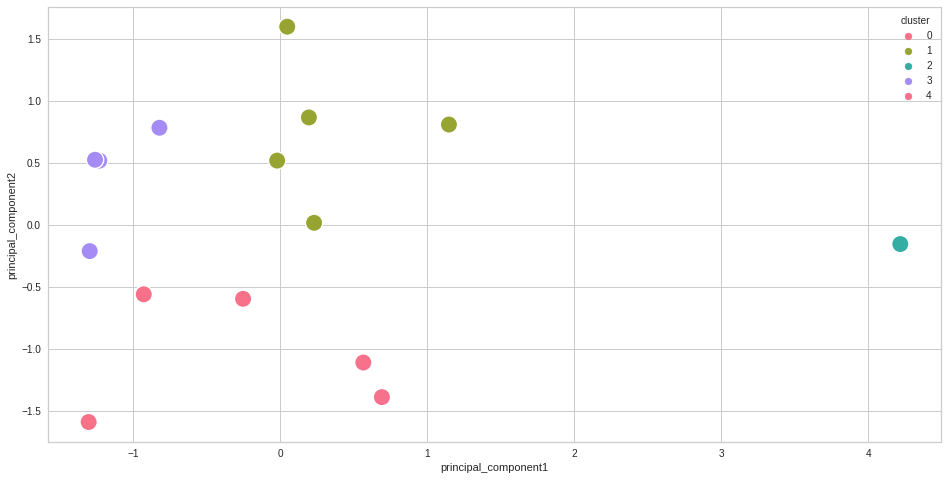

In [62]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2019, palette = 'husl')

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [63]:
pca_AZ_2019.head(3)

,principal_component1,principal_component2,cluster
0,-1.30120,-1.592304,0
1,-0.82006,0.782015,3
2,0.69250,-1.391217,4


In [64]:
AZ_2019['county'].unique()

array(['Apache County', 'Cochise County', 'Coconino County',
       'Gila County', 'Graham County', 'Greenlee County', 'La Paz County',
       'Maricopa County', 'Mohave County', 'Navajo County', 'Pima County',
       'Pinal County', 'Santa Cruz County', 'Yavapai County',
       'Yuma County'], dtype=object)

In [65]:
AZ_2019['cluster']= labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
AZ_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

,county,density,average_listing_price,rural_%,cluster
93,Apache County,5,463216.250000,74.061076,3
94,Cochise County,20,252562.333333,36.301067,4
95,Coconino County,7,666891.166667,31.466066,1


In [67]:
AZ_2019[(AZ_2019['cluster']==2)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
100,4013,AZ,Maricopa County,480,2.3638,2,667522.25,2


### Identifies the Cluster's Properties

In [68]:
for x in range(0,5):
  print("This is the Arizona's 2019 cluster ", x, "\n", AZ_2019[(AZ_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the Arizona's 2019 cluster  0 
          FIPS  density    rural_%  rural_cat  average_listing_price
count     5.0      5.0   5.000000        5.0               5.000000
mean   4021.0     56.4  17.940901        2.0          364066.500000
min    4015.0     16.0   7.523491        2.0          254077.416667
max    4027.0    113.0  26.883172        2.0          444905.083333 

This is the Arizona's 2019 cluster  1 
          FIPS  density    rural_%  rural_cat  average_listing_price
count     2.0      2.0   2.000000        2.0               2.000000
mean   4015.0     18.0  32.331622        2.0          638418.416667
min    4005.0      7.0  31.466066        2.0          609945.666667
max    4025.0     29.0  33.197178        2.0          666891.166667 

This is the Arizona's 2019 cluster  2 
          FIPS  density  rural_%  rural_cat  average_listing_price
count     1.0      1.0   1.0000        1.0                   1.00
mean   4013.0    480.0   2.3638        2.0              667522.2

### 2.2b For the Year 2021

In [69]:
AZ_2021 = df_FIPS_2021[(df_FIPS_2021['state'] == 'AZ')]
AZ_2021.shape

(15, 7)

In [70]:
scale =scaler.fit_transform(AZ_2021[['density', 'average_listing_price', 'rural_%']])
AZ_2021_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
AZ_2021_scale.head(5) 

,density,average_listing_price,rural_%
0,-0.447950,0.176940,2.094111
1,-0.319557,-1.069204,0.114922
2,-0.430831,1.654286,-0.138504
3,-0.396593,0.545960,0.364466
4,-0.422272,-1.606393,0.646218


In [71]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(AZ_2021_scale)
pca_AZ_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_AZ_2021.head(5)

,principal_component1,principal_component2
0,-1.611692,-1.046004
1,-0.606853,0.924118
2,0.255065,-1.425383
3,-0.360056,-0.640160
4,-1.174367,1.184367


### Determine Optimal Clusters (Elbow Method)

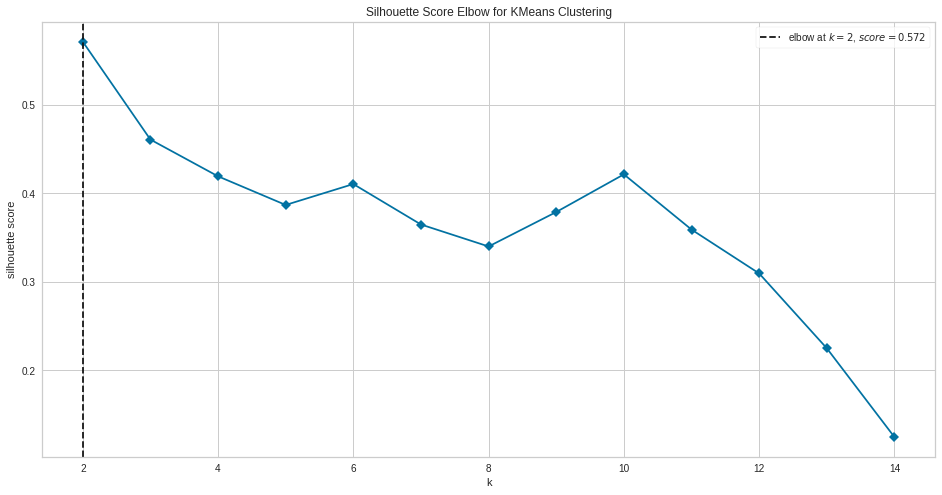

In [72]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_AZ_2021)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [73]:
for i in range(2, 10):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_AZ_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_AZ_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5716510301888433
Silhouette score for k(clusters)= 3 is 0.46096565667065803
Silhouette score for k(clusters)= 4 is 0.41941563873919996
Silhouette score for k(clusters)= 5 is 0.3870170049976736
Silhouette score for k(clusters)= 6 is 0.41066479984059157
Silhouette score for k(clusters)= 7 is 0.3703882829980734
Silhouette score for k(clusters)= 8 is 0.348464898412162
Silhouette score for k(clusters)= 9 is 0.3486803708840085


In [74]:
K = range(2, 6)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_AZ_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [75]:
# Sum of Square Errors
kmeans.inertia_

3.638154330075893

In [76]:
# No. of iteration required to converge
kmeans.n_iter_

2

In [77]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_AZ_2021)
Counter(labels)

Counter({0: 5, 1: 4, 2: 1, 3: 3, 4: 2})

In [78]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
0,0,5
4,1,4
3,2,1
2,3,3
1,4,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

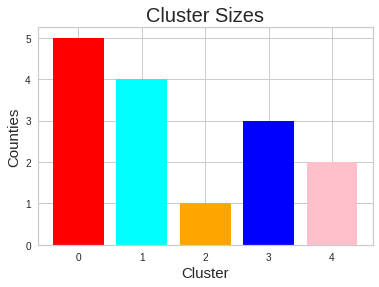

In [79]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [80]:
pca_AZ_2021['cluster'] = labels
kmeans.cluster_centers_

array([[-0.9274376 , -0.64779231],
       [ 0.39436609,  1.19212075],
       [ 4.01367275, -0.54291181],
       [ 0.27575677, -1.03169847],
       [-0.89060971,  1.05424289]])

In [81]:
# Look at outlier
pca_AZ_2021[pca_AZ_2021.cluster==0][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
0,-1.611692,-1.046004
3,-0.360056,-0.640160
5,-0.593817,-0.724483
6,-1.088308,-0.455861
9,-0.983314,-0.372455


In [82]:
km = KMeans(n_clusters=5)
kmeans = km.fit(pca_AZ_2021)

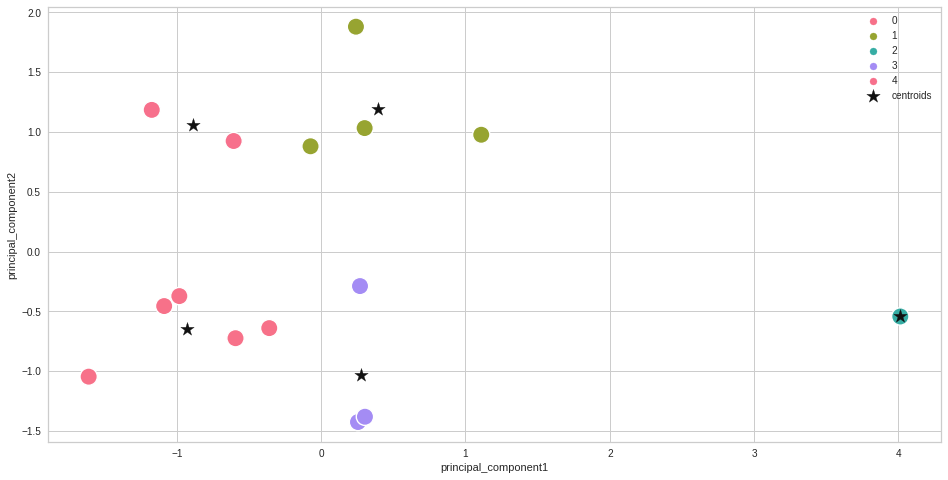

In [83]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2021, palette = 'husl')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

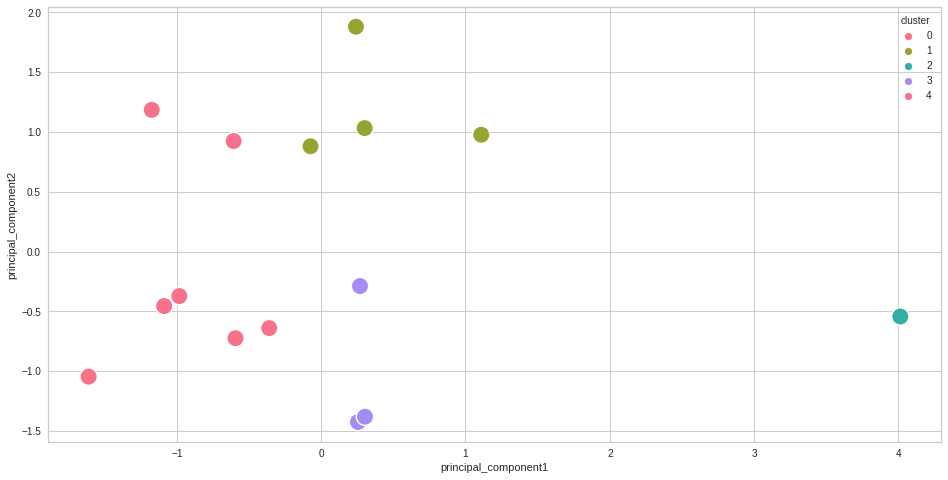

In [84]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_AZ_2021, palette = 'husl')

### Identify Scatterplot's Bubble
Below identifies the cluster 

In [85]:
pca_AZ_2021.head(3)

,principal_component1,principal_component2,cluster
0,-1.611692,-1.046004,0
1,-0.606853,0.924118,4
2,0.255065,-1.425383,3


In [86]:
AZ_2021['cluster']=labels
AZ_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
91,Apache County,5,626875.333333,74.061076,0
92,Cochise County,20,396628.916667,36.301067,4
93,Coconino County,7,899840.000000,31.466066,3


In [87]:
AZ_2021[(AZ_2021['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
91,4001,AZ,Apache County,5,74.061076,1,626875.333333,0
94,4007,AZ,Gila County,11,41.062000,2,695058.083333,0
96,4011,AZ,Greenlee County,5,46.568686,2,687275.666667,0
97,4012,AZ,La Paz County,3,56.327786,1,587637.666667,0
100,4017,AZ,Navajo County,10,54.138242,1,580345.916667,0


### Identifies the Cluster's Properties

In [88]:
for x in range(0,5):
  print("This is the Arizona's 2021 cluster ", x, "\n", AZ_2021[(AZ_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the Arizona's 2021 cluster  0 
          FIPS  density    rural_%  rural_cat  average_listing_price
count     5.0      5.0   5.000000        5.0               5.000000
mean   4009.6      6.8  54.431558        1.4          635438.533333
min    4001.0      3.0  41.062000        1.0          580345.916667
max    4017.0     11.0  74.061076        2.0          695058.083333 

This is the Arizona's 2021 cluster  1 
          FIPS  density    rural_%  rural_cat  average_listing_price
count     4.0      4.0   4.000000        4.0               4.000000
mean   4020.5     61.0  15.705333        2.0          434679.291667
min    4015.0     16.0   7.523491        2.0          319238.000000
max    4027.0    113.0  22.963644        2.0          514230.166667 

This is the Arizona's 2021 cluster  2 
          FIPS  density  rural_%  rural_cat  average_listing_price
count     1.0      1.0   1.0000        1.0               1.000000
mean   4013.0    480.0   2.3638        2.0          833891.08333

## 2.3 Individual State - Massachusetts

### 2.3a For the Year 2019

In [89]:
MA_2019 = df_FIPS_2019[(df_FIPS_2019['state'] == 'MA')]

In [90]:
MA_2019.shape

(14, 7)

In [91]:

scaler = MinMaxScaler()
scale =scaler.fit_transform(MA_2019[['density', 'average_listing_price', 'rural_%']])
MA_2019_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
MA_2019_scale.head(5) 

,density,average_listing_price,rural_%
0,0.035240,0.180494,0.136300
1,0.002790,0.090073,0.579857
2,0.069452,0.047906,0.179556
3,0.007195,0.592789,0.716592
4,0.113281,0.137776,0.076713


In [92]:
# Apply PCA to reduce the dimensionality

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(MA_2019_scale)
pca_MA_2019 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_MA_2019.head(5)

,principal_component1,principal_component2
0,0.088396,-0.059248
1,-0.290041,-0.099233
2,0.072122,-0.179183
3,-0.392216,0.411486
4,0.182043,-0.096938


### Determine Optimal Clusters (Elbow Method)

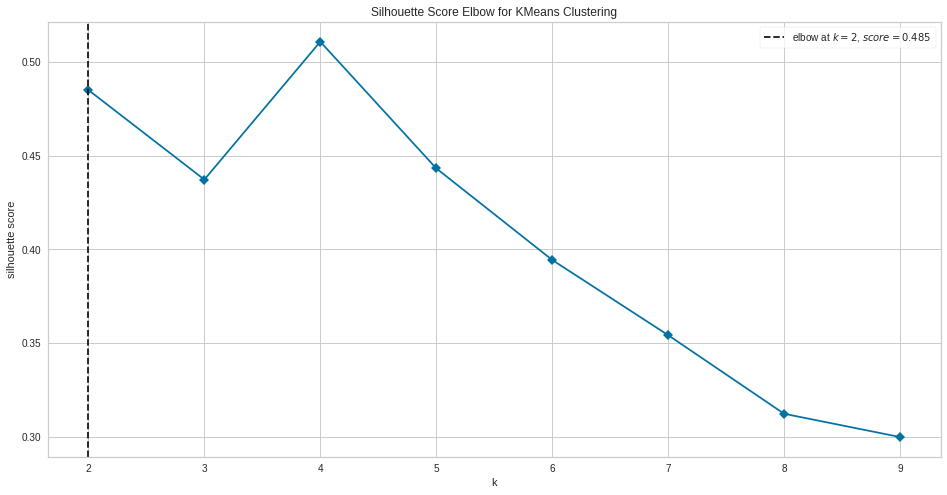

In [93]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_MA_2019)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [94]:
for i in range(2, 7):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_MA_2019).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_MA_2019, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.43749724709321275
Silhouette score for k(clusters)= 3 is 0.43724301342905225
Silhouette score for k(clusters)= 4 is 0.510780223328182
Silhouette score for k(clusters)= 5 is 0.4432440041846996
Silhouette score for k(clusters)= 6 is 0.3943974885313494


In [95]:
K = range(2, 7)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_MA_2019)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [96]:
# Sum of Square Errors
kmeans.inertia_

0.0905623735152205

In [97]:
# No. of iterator required to converge
kmeans.n_iter_

2

In [98]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_MA_2019)
Counter(labels)

Counter({0: 1, 1: 3, 2: 1, 3: 1, 4: 7, 5: 1})

In [99]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
3,0,1
1,1,3
5,2,1
4,3,1
0,4,7
2,5,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

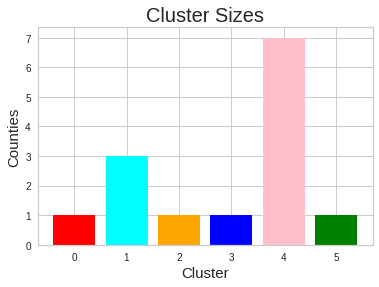

In [100]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [101]:
pca_MA_2019['cluster'] = labels
kmeans.cluster_centers_

array([[-0.63196152, -0.12709831],
       [-0.19586212, -0.1463885 ],
       [ 0.76866061,  0.19958935],
       [-0.08339802,  0.76783236],
       [ 0.13235727, -0.11609194],
       [-0.39221557,  0.41148566]])

In [102]:
# Look at outlier
pca_MA_2019[pca_MA_2019.cluster==2][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
12,0.768661,0.199589


In [103]:
km = KMeans(n_clusters=6)
kmeans = km.fit(pca_MA_2019)

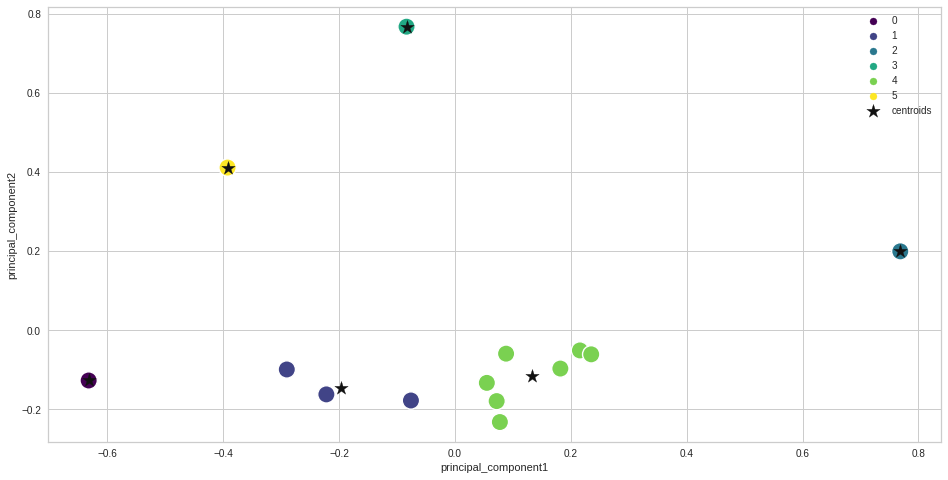

In [104]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2019, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

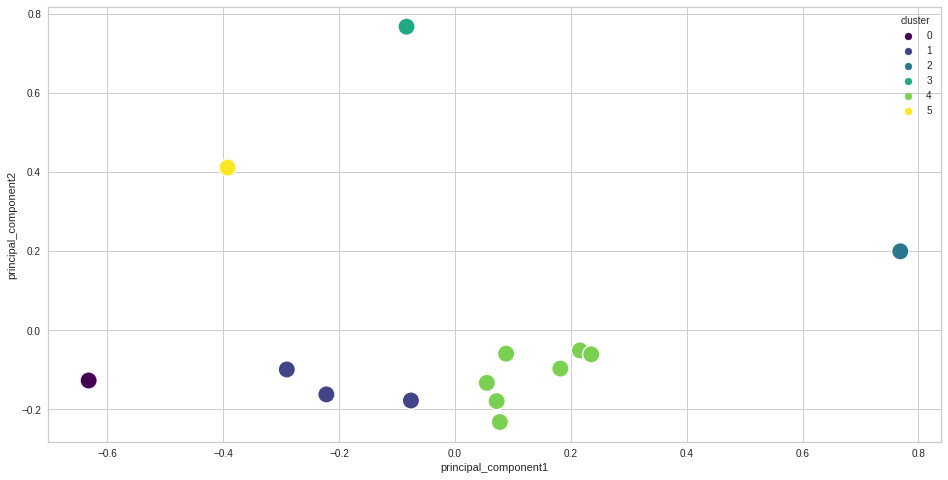

In [105]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2019, palette = 'viridis')

### Identifying the Scatterplot Bubble
Below identifies the cluster 

In [106]:
pca_MA_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   principal_component1  14 non-null     float64
 1   principal_component2  14 non-null     float64
 2   cluster               14 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 408.0 bytes


In [107]:
MA_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 1213 to 1226
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   FIPS                   14 non-null     int64  
 1   state                  14 non-null     object 
 2   county                 14 non-null     object 
 3   density                14 non-null     int64  
 4   rural_%                14 non-null     float64
 5   rural_cat              14 non-null     int64  
 6   average_listing_price  14 non-null     float64
dtypes: float64(2), int64(3), object(2)
memory usage: 896.0+ bytes


In [108]:
MA_2019['cluster']=labels
MA_2019[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
1213,Barnstable County,581,966429.416667,7.483047,4
1214,Berkshire County,139,631492.666667,31.593748,1
1215,Bristol County,1047,475299.666667,9.834302,4


In [109]:
MA_2019[(MA_2019['cluster']==0)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1218,25011,MA,Franklin County,101,54.43171,1,336535.75,0


### Identifies the Cluster's Properties

In [110]:
for x in range(0,6):
  print("This is the Massachusetts' 2019 cluster ", x, "\n", MA_2019[(MA_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the Massachusetts' 2019 cluster  0 
           FIPS  density   rural_%  rural_cat  average_listing_price
count      1.0      1.0   1.00000        1.0                   1.00
mean   25011.0    101.0  54.43171        1.0              336535.75
min    25011.0    101.0  54.43171        1.0              336535.75
max    25011.0    101.0  54.43171        1.0              336535.75 

This is the Massachusetts' 2019 cluster  1 
           FIPS     density    rural_%  rural_cat  average_listing_price
count      3.0    3.000000   3.000000        3.0               3.000000
mean   25015.0  338.666667  25.809245        2.0          493940.472222
min    25003.0  139.000000  18.390286        2.0          421683.500000
max    25027.0  570.000000  31.593748        2.0          631492.666667 

This is the Massachusetts' 2019 cluster  2 
           FIPS  density   rural_%  rural_cat  average_listing_price
count      1.0      1.0  1.000000        1.0           1.000000e+00
mean   25025.0  13722.0  

### 2.3b For the Year 2021

In [111]:
MA_2021 = df_FIPS_2021[(df_FIPS_2021['state'] == 'MA')]
MA_2021.shape

(14, 7)

In [112]:
scale =scaler.fit_transform(MA_2021[['density', 'average_listing_price', 'rural_%']])
MA_2021_scale = pd.DataFrame(scale, columns=['density', 'average_listing_price', 'rural_%'])
MA_2021_scale.head(5) 

,density,average_listing_price,rural_%
0,0.035240,0.253872,0.136300
1,0.002790,0.138436,0.579857
2,0.069452,0.066607,0.179556
3,0.007195,0.823944,0.716592
4,0.113281,0.129792,0.076713


In [113]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(MA_2021_scale)
pca_MA_2021 = pd.DataFrame(data=principalComponents, columns=['principal_component1', 'principal_component2'])
pca_MA_2021.head(5)

,principal_component1,principal_component2
0,0.077112,0.035704
1,-0.228811,-0.189652
2,0.138753,-0.130599
3,-0.614053,0.393302
4,0.212792,-0.032415


### Identifies the Cluster's Properties

In [114]:
for x in range(0,6):
  print("This is the Massachusetts' 2019 cluster ", x, "\n", MA_2019[(MA_2019['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the Massachusetts' 2019 cluster  0 
           FIPS  density   rural_%  rural_cat  average_listing_price
count      1.0      1.0   1.00000        1.0                   1.00
mean   25011.0    101.0  54.43171        1.0              336535.75
min    25011.0    101.0  54.43171        1.0              336535.75
max    25011.0    101.0  54.43171        1.0              336535.75 

This is the Massachusetts' 2019 cluster  1 
           FIPS     density    rural_%  rural_cat  average_listing_price
count      3.0    3.000000   3.000000        3.0               3.000000
mean   25015.0  338.666667  25.809245        2.0          493940.472222
min    25003.0  139.000000  18.390286        2.0          421683.500000
max    25027.0  570.000000  31.593748        2.0          631492.666667 

This is the Massachusetts' 2019 cluster  2 
           FIPS  density   rural_%  rural_cat  average_listing_price
count      1.0      1.0  1.000000        1.0           1.000000e+00
mean   25025.0  13722.0  

### Determine Optimal Clusters (Elbow Method)

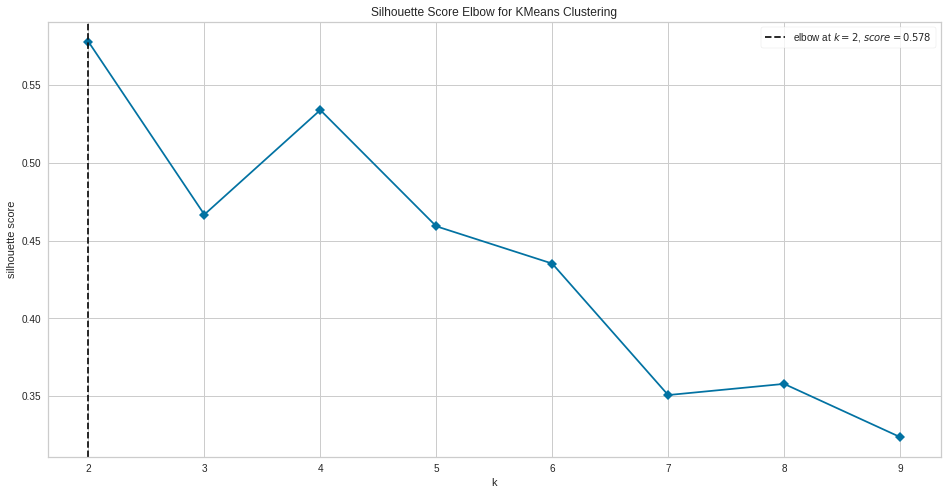

In [115]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10), metric = 'silhouette', timings=False)
fig= plt.figure(figsize=(16,8))
visualizer.fit(pca_MA_2021)   # Fit the data to the visualizer
visualizer.show()   # Finalize and render the figure

### Run Optimal K-means
Create and fit the optimal K-Means cluster model

In [116]:
for i in range(2, 7):
    labels= cluster.KMeans (n_clusters = i, random_state=200).fit(pca_MA_2021).labels_
    print("Silhouette score for k(clusters)= "+str(i)+" is "+str(
        metrics.silhouette_score(pca_MA_2021, labels, metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters)= 2 is 0.5778967861117668
Silhouette score for k(clusters)= 3 is 0.46675451174774435
Silhouette score for k(clusters)= 4 is 0.533957517803899
Silhouette score for k(clusters)= 5 is 0.45921827716691116
Silhouette score for k(clusters)= 6 is 0.43523974229474127


In [117]:
K = range(2, 7)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans = kmeans.fit(pca_MA_2021)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [118]:
# Sum of Square Errors
kmeans.inertia_

0.10321897708334418

In [119]:
# No. of iteration required to converge
kmeans.n_iter_

3

In [120]:
# Fit and predict cluster labels
labels = kmeans.fit_predict(pca_MA_2021)
Counter(labels)

Counter({0: 4, 1: 2, 2: 1, 3: 1, 4: 4, 5: 2})

In [121]:
D = dict(Counter(labels))
counter_df = pd.DataFrame(list(D.items()),columns = ['cluster','counties']).sort_values(by='cluster')
counter_df 

,cluster,counties
0,0,4
3,1,2
4,2,1
5,3,1
2,4,4
1,5,2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Counties')

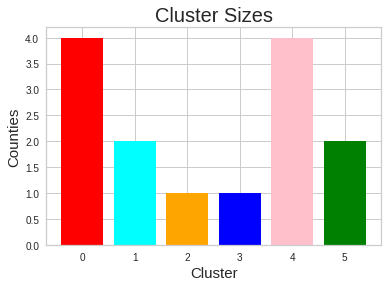

In [122]:
plt.bar('cluster', 'counties', data=counter_df, color=['red', 'cyan', 'orange', 'blue', 'pink', 'green'])
plt.title('Cluster Sizes',fontsize=20)
plt.xlabel("Cluster", size=15)
ax = plt.axes()
ax.set_xticks(counter_df.cluster)
plt.ylabel("Counties", size=15)

In [123]:
pca_MA_2021['cluster'] = labels
kmeans.cluster_centers_

array([[ 0.19178577,  0.00779441],
       [-0.50743765,  0.51975889],
       [-0.4984976 , -0.40616486],
       [ 0.65346992,  0.44335182],
       [ 0.11107136, -0.16528982],
       [-0.17576277, -0.22336155]])

In [124]:
# Look at outlier
pca_MA_2021[pca_MA_2021.cluster==1][['principal_component1', 'principal_component2']]

,principal_component1,principal_component2
3,-0.614053,0.393302
9,-0.400822,0.646216


In [125]:
km = KMeans(n_clusters=6)
kmeans = km.fit(pca_MA_2021)

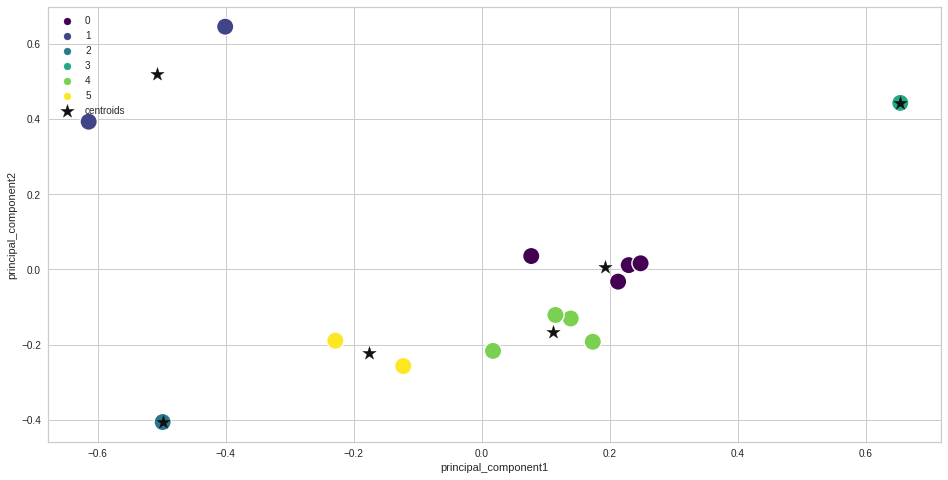

In [126]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2021, palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="*", c="k", s=200, label="centroids")
plt.legend()
plt.show()

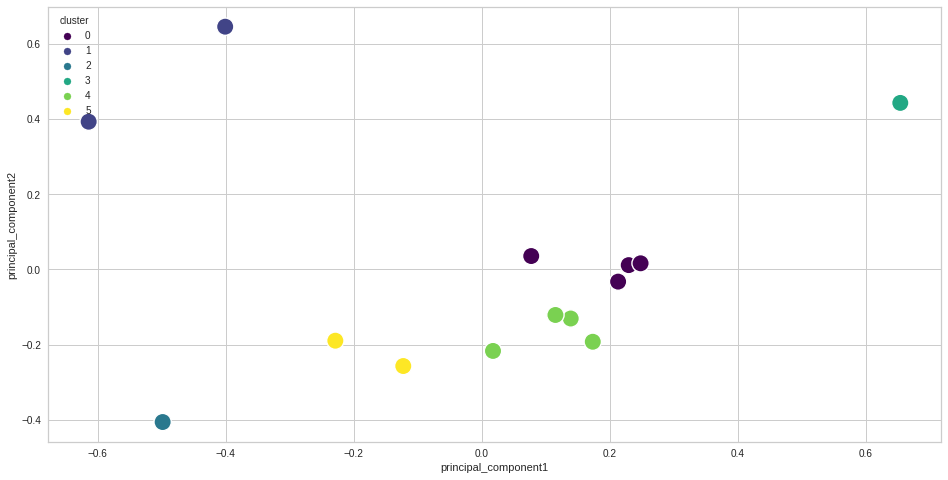

In [127]:
fig= plt.figure(figsize=(16,8))
sns.scatterplot(x='principal_component1', y='principal_component2', hue='cluster', s= 300, 
                data=pca_MA_2021, palette = 'viridis')

### Identifying the Scatterplot Bubble
Below identifies the cluster 

In [128]:
pca_MA_2021.head(3)

,principal_component1,principal_component2,cluster
0,0.077112,0.035704,0
1,-0.228811,-0.189652,5
2,0.138753,-0.130599,4


In [129]:
MA_2021['cluster']=labels
MA_2021[['county','density', 'average_listing_price', 'rural_%','cluster']].head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,county,density,average_listing_price,rural_%,cluster
1211,Barnstable County,581,1.476872e+06,7.483047,0
1212,Berkshire County,139,9.752928e+05,31.593748,5
1213,Bristol County,1047,6.631889e+05,9.834302,4


In [130]:
MA_2021[(MA_2021['cluster']==1)]

,FIPS,state,county,density,rural_%,rural_cat,average_listing_price,cluster
1214,25007,MA,Dukes County,199,39.026308,2,3.953890e+06,1
1220,25019,MA,Nantucket County,316,18.895006,2,4.718867e+06,1


### Identifies the Cluster's Properties

In [131]:
for x in range(0,6):
  print("This is the Massachusetts' 2021 cluster ", x, "\n", MA_2021[(MA_2021['cluster']==x)].describe().iloc[[0, 1, 3, -1]].drop(['cluster'], axis=1), '\n')

This is the Massachusetts' 2021 cluster  0 
           FIPS  density   rural_%  rural_cat  average_listing_price
count      4.0      4.0  4.000000        4.0           4.000000e+00
mean   25012.0   1513.0  3.998822        2.0           1.143984e+06
min    25001.0    581.0  1.240489        2.0           9.377348e+05
max    25021.0   1995.0  7.483047        2.0           1.476872e+06 

This is the Massachusetts' 2021 cluster  1 
           FIPS  density    rural_%  rural_cat  average_listing_price
count      2.0      2.0   2.000000        2.0           2.000000e+00
mean   25013.0    257.5  28.960657        2.0           4.336378e+06
min    25007.0    199.0  18.895006        2.0           3.953890e+06
max    25019.0    316.0  39.026308        2.0           4.718867e+06 

This is the Massachusetts' 2021 cluster  2 
           FIPS  density   rural_%  rural_cat  average_listing_price
count      1.0      1.0   1.00000        1.0               1.000000
mean   25011.0    101.0  54.43171       